# BT2101 Introduction to Decision Tree

## Adapted to Python 3.6 Environment
### By Nelson 

## 1 Goal

In this notebook, we will explore **Decision Tree** including:
* User-defined functions
* Open-source package: `scikit-learn`

For the **Decision Tree** method, you will:
* Use numpy to write functions
* Write binary recursive splitting functions
* Write decision functions
* Write pruning functions
* Use open-source package to do classification

In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log
from __future__ import division
from collections import defaultdict
%matplotlib inline

## 2 Summary of Classification Tree

#### Classification Tree
A typical classification tree looks like this:
<img src="https://cdn-images-1.medium.com/max/750/1*2jnsFCe0YmRjb8EvVAo93w.gif" width="500">

#### Steps for Binary Splitting (E.g., Entropy)
1. Compute the entropy for data-set;
2. For every attribute/feature, calculate information gain for this attribute;
3. Pick the feature with highest information gain;
4. Repeat until we get the tree we desired;

#### Entropy and Information Gain
<img src="https://cdn-images-1.medium.com/max/2000/1*EoWJ8bxc-iqBS-dF-XxsBA.jpeg" width="900">
<img src="https://cdn-images-1.medium.com/max/2000/1*wQjVzx7zCVb87htqk46vUA.jpeg" width="900">

#### Alternative Criterion for Binary Splitting
There are a few possible criteria we can use for selecting features and making the binary splits of classification decision tree:
* Classification Error Rate
* Gini Index

## 3 Case: Kaggle Competition - Lending Club Loan Status
### 3.1 Data

#### Overview
The file "LoanStats_2018Q1.csv" contains complete loan data for all loans issued through the 2018 Quarter-1, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others.  <br/>
Please see https://www.kaggle.com/wendykan/lending-club-loan-data/home.

#### Attributes
The dataset can be downloaded [here](https://www.lendingclub.com/info/download-data.action). Information on the columns and features can be found in data dictionary. A data dictionary is provided in a separate file "LCDataDictionary.xlsx".

#### Goal
Our goal is to show how to do binary splitting and tree pruning for a classification tree.

#### Selected Features
For the sake of simplicity, We only select 3 categorical variables as features. We will further transform these categorical variables into binary ones. You need to learn how to fit decision trees when features are continuous variables. 

### 3.2 Build Tree

#### Function 1. Calculating entropy value of a given tree node with labels of samples.

#### Function 2. Calculating information gain when a given tree node is splitted by a given feature

In [2]:
def entropy(sample_labels):
    '''This function is used to calculate entropy value of a given tree node, in which there are samples with labels (0, 1) or (-1, 1).
    Inputs:
    1) sample_labels: Labels for samples in the current tree node, such as (1, 0, 0, 1, 0) or (1, -1, -1, 1, 0)
    
    Outputs:
    1) entropy: Entropy value of labels in the current tree node.       
    
    '''
    
    # Assert np.array
    sample_labels = np.array(sample_labels)
    
    # What if sample_labels are empty
    if sample_labels.size == 0:
        return 0  
    
    # What if all the labels are the same
    class_values = np.unique(sample_labels) # Sample labels/classes; Usually (0,1), sometimes (-1,1)
    
    num0 = len(list(filter(lambda x:x==class_values[0], sample_labels))) # Number of samples with one label
    num1 = len(list(filter(lambda x:x==class_values[1], sample_labels))) if class_values.size > 1 else 0 # Number of samples with another label
    
#     num0 = []
#     num1 = []
#     for x in sample_labels:
#         num0.append(class_values[0])
#         if class_values.size > 1:
#             num1.append(class_values[1])
#         else:
#             num1.append(0)
        
#     num0 = len(num0)
#     num1 = len(num1)
        

    if sample_labels.size == num0 or sample_labels.size == num1:
        return 0
    
    # Calculate entropy value      
    p0 = num0 / (num0+num1) # Probability of class 0 labels
    p1 = 1 - p0 # Probability of class 1 labels
    
    entropy = -(p0*log(p0,2) + p1*log(p1,2))    
    
    return entropy


In [3]:
def info_gain(samples, output, feature):
    '''This function is used to calculate information gain when a given tree node is splitted by a given feature.
    Inputs:
    1) samples: Samples in the current tree node before making split on the feature (Pandas Dataframe)
    1) output: Name of the output column
    2) feature: Name of the feature used to split the current tree node. Remember the features we selected in this case are binary.
    
    Outputs:
    1) information_gain: How much reduction in entropy value if the current tree node is splitted by the feature 
    2) subsamples[0]: Data samples where feature values are one label (e.g., 0 or -1)
    3) subsamples[1]: Data samples where feature values are another label (e.g., 1)
    
    '''
    
    # Split samples by feature values into subsamples
    subsamples = defaultdict()
    entropy_after = 0 # Entropy value after splitting
    
    for feature_value in np.unique(samples[feature]):
        subsamples[feature_value] = samples[samples[feature] == feature_value]
        temp = subsamples[feature_value] # Store a temporary copy
        p = len(temp) / len(samples) # Proportion of this subsample
        entropy_after += p * entropy(temp[output])
        
    # Calculate information gain 
    information_gain = entropy(samples[output]) - entropy_after
    
    # Left or Right subtree may be None  
    return (information_gain, subsamples[0] if 0 in subsamples else None, subsamples[1] if 1 in subsamples else None)  

In [4]:
# Let us have a test
a = np.array([[1,0,0,1],[0,1,1,0],[1,1,1,1],[0,0,0,0],[1,1,0,0]])
data = pd.DataFrame(a, columns=['x1','x2','x3','y'])
info_gain(data, 'y', 'x1')[1]

x1  x2  x3  y
1   0   1   1  0
3   0   0   0  0

In [5]:
# Let us have a test
a = np.array([[1,0,0,1],[1,1,1,0],[1,1,1,1],[1,0,0,0],[1,1,0,0]])
data = pd.DataFrame(a, columns=['x1','x2','x3','y'])
info_gain(data, 'y', 'x1')

(0.0, None,    x1  x2  x3  y
 0   1   0   0  1
 1   1   1   1  0
 2   1   1   1  1
 3   1   0   0  0
 4   1   1   0  0)

#### Why is information gain nonnegative?
Math Proof: https://www.cs.cmu.edu/~ggordon/780-fall07/fall06/homework/15780f06-hw4sol.pdf

#### Function 3. Decide the best feature to split on: Using information gain and entropy as criterion
1. Loop over each feature in the feature list;
2. For each loop (feature f), split the data into 2 groups: In group 1 (left split), all samples' feature f has value 0. In group 2 (right split), all samples' feature f has value 1;
3. Calculate the information gain for this split;
4. If the information gain for this split using this feature is highest, then pick this feature.

In [6]:
def best_feature_split(samples, output, features):
    '''This function is used to determine the best feature to split based on maximized information gain.
    Inputs:
    1) samples: Samples in the current tree node before making split on the feature (Pandas Dataframe)
    2) output: Name of the output column
    3) features: A list of feature names
    
    Outputs:
    1) best_feature: The best feature which is used to do binary splitting
    2) best_left_split: Data samples where the best feature's values are 0
    3) best_right_split: Data samples where the best feature's values are 1      
    
    '''
    
    # Initialize best feature, best information gain value, best left/right split samples
    best_feature = None 
    best_information_gain = 0
    best_left_split = None
    best_right_split = None    
    
    samples_row = float(len(samples)) # Number of rows in the data samples
    
    # Loop through features and find the best feature
    for feature in features:
        
        # Splitting the data samples
        current_split = info_gain(samples, output, feature)
        information_gain = current_split[0]
        left_split = current_split[1]
        right_split = current_split[2]
        
        # Check if this feature is better
        if information_gain >= best_information_gain:
            best_feature, best_information_gain, best_left_split, best_right_split = feature, information_gain, left_split, right_split
    
    return (best_feature, best_information_gain, best_left_split, best_right_split)

In [7]:
# Let us have a test
a = np.array([[1,0,0,1],[0,1,1,0],[1,1,1,1],[0,0,0,0],[1,1,0,0]])
data = pd.DataFrame(a, columns=['x1','x2','x3','y'])
best_feature_split(data, 'y', ['x1','x2','x3'])

('x1', 0.4199730940219749,    x1  x2  x3  y
 1   0   1   1  0
 3   0   0   0  0,    x1  x2  x3  y
 0   1   0   0  1
 2   1   1   1  1
 4   1   1   0  0)

In [8]:
a = np.array([[1,0,0,1],[1,1,1,0],[1,1,1,1],[1,0,0,0],[1,1,0,0]])
data = pd.DataFrame(a, columns=['x1','x2','x3','y'])
best_feature_split(data, 'y', ['x1','x2','x3'])

('x3', 0.01997309402197489,    x1  x2  x3  y
 0   1   0   0  1
 3   1   0   0  0
 4   1   1   0  0,    x1  x2  x3  y
 1   1   1   1  0
 2   1   1   1  1)

#### Function 4. Build our classification tree and do pre-pruning
We need to decide stopping conditions (i.e., pre-pruning):
1. The samples' labels in the current node are the same (either 0 or 1);
2. All the features have already been used for split;
3. The current tree has already reached maximum depth **max_depth**;
4. The number of samples in the current node is lower than minimum number **min_number**;
5. The information gain for the current split is lower than a threshold **min_infogain** 

##### Stopping Condition 1: The samples' labels in the current node are the same (either 0/-1 or 1)

In [9]:
def stop_1(node_labels):
    '''This function is used to verify whether stopping condition 1 is satisfied.
    Inputs:
    1) node_labels: The samples' labels in the current node
    
    Outputs:
    1) True if they are all the same, False if otherwise
    
    '''
    
    # numpy array
    node_labels = np.array(node_labels)
    
    # Empty labels
    if len(node_labels) == 0:
        return True
    
    if len(np.unique(node_labels)) == 1:
        print("Stopping Condition 1: The samples' labels in the current node are the same (either 0/-1 or 1)")
        return True
    else:
        return False

##### Stopping Condition 2: All the features have already been used for split

In [10]:
def stop_2(features):
    '''This function is used to verify whether stopping condition 2 is satisfied.
    Inputs:
    1) features: A list of feature names
    
    Outputs:
    1) True if the feature list is empty, False if otherwise
    
    '''
    
    if len(features) == 0 or features == None:
        print("Stopping Condition 2: All the features have already been used for split")
        return True
    else:
        return False  

##### Stopping Condition 3: The current tree has already reached maximum depth **max_depth**

In [11]:
def stop_3(tree_depth, max_depth):
    '''This function is used to verify whether stopping condition 3 is satisfied.
    Inputs:
    1) tree_depth: The depth of the current tree
    2) max_depth: Maximum tree depth
    
    Outputs:
    1) True if the current depth reaches maximum depth, False if otherwise
    
    '''
    
    if tree_depth >= max_depth:
        print("Stopping Condition 3: The current tree has already reached maximum depth")
        return True
    else:
        return False  

##### Stopping Condition 4: The number of samples in the current node is lower than minimum number **min_number**

In [12]:
def stop_4(samples, min_number):
    '''This function is used to verify whether stopping condition 4 is satisfied.
    Inputs:
    1) samples: Data samples in the current node (Pandas DataFrame)
    2) min_number: Minimum number of node size
    
    Outputs:
    1) True if sample size is smaller than the minimum number, False if otherwise
    
    '''
    
    if samples.size <= min_number:
        print("Stopping Condition 4: The number of samples in the current node is lower than minimum number")
        return True
    else:
        return False      

##### Stopping Condition 5: The information gain for the current split is lower than a threshold **min_infogain** 

In [13]:
# info_gain(samples, output, feature) -> information gain, left, right
# best_feature_split(samples, output, features) -> feature, information gain, left, right
def stop_5(info_gain, min_infogain):
    '''This function is used to verify whether stopping condition 5 is satisfied.
    Inputs:
    1) info_gain: Information gain after this best split
    2) min_infogain: Minimum information gain
    
    Outputs:
    1) True if information gain after this best splitting is smaller than the minimum number, False if otherwise
    
    '''
    
    if info_gain <= min_infogain:
        print("Stopping Condition 5: The information gain for the current split is lower than a threshold")
        return True
    else:
        return False      

##### Build classification tree
The data structure for the nested tree structure (including temporary tree nodes, and leaf nodes) is shown as:

{ <br/>
   'label': None for temporary node, or predicted label at the leaf node (e.g., "Majority Voting" criterion) for leaf node; <br/>
   'left_tree': Left tree after the selected feature (=0 or -1) is splitted for temporary node, None for leaf node; <br/>
   'right_tree': Right tree after the selected feature (=1) is splitted for temporary node, None for leaf node; <br/>
   'best_feature': The feature that is selected to do binary split for temporary node, None for leaf node. <br/>
}

In [14]:
def majority_vote(output_labels):
    '''This function is used to get predicted label based on "Majority Voting" criterion for the current leaf node.     
    Inputs:
    1) output_labels: Outputs (labels) in this leaf node, such as [1, 0, 0, 1, 1]
    
    Outputs:
    1) prediction: Predicted label for this leaf node (e.g., 0/-1, or 1)
    
    '''
    
    # numpy array
    output_labels = np.array(output_labels)
    
    # Empty label
    if output_labels.size == 0:
        return None
    
    # Count output labels (0/-1 or 1)
    values = np.unique(output_labels)
    
    if len(values) == 1:
        return values[0]
    else:
        num0 = len(output_labels[output_labels == values[0]])
        num1 = len(output_labels[output_labels == values[1]])
        return values[1] if num1 >= num0 else values[0] # Prediction based on "Majority Voting" criterion   

In [15]:
def ClassificationTree(samples, output, features, step, tree_depth, max_depth, min_number, min_infogain):
    '''This function is used to build a classification tree in a recursive way.
       Remember how you build a binary tree in the previous C++ and Data Structure courses).
       
    Inputs:
    1) samples: Samples in the current tree node before making split on the feature (Pandas Dataframe)
    2) output: Name of the output column
    3) features: A list of feature names
    4) step: The current binary split step
    5) tree_depth: The depth of the current tree
    6) max_depth: Maximum depth this tree can grow
    7) min_number: Minimum number of node size
    8) min_infogain: Minimum information gain
    
    Outputs:
    1) tree_nodes: Nested tree nodes, which are stored and shown in nested dictionary type    
    
    '''
    
    # If samples are empty, return None
    if samples is None or len(samples)==0:
        return None
           
    
    current_features = features # Current feature list
    labels = samples[output] # Output labels in the current tree node

    print("----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------")
    print("Step %s: Current tree depth is %s. Current tree node has %s data points" % (step, tree_depth, len(samples))) # Sample size
    
    # Verify whether stopping conditions 1-4 are satisfied. If satisfied, return a leaf_node
    if stop_1(labels) or stop_2(current_features) or stop_3(tree_depth, max_depth) or stop_4(samples, min_number):
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None          
            
                }
    
    # If pass stopping conditions 1-4, then do best splitting
    best_split = best_feature_split(samples, output, current_features)
    best_feature, best_infogain, best_left, best_right = best_split[0], best_split[1], best_split[2], best_split[3]
    
    # Verify whether stopping condition 5 is satisfied. If satisfied, return a leaf node
    if stop_5(best_infogain, min_infogain):
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None          
            
                } 
    
    # If pass stopping condition 5, then move on
    step += 1
    print("Step %s: Binary split on %s. Size of Left and Right tree is (%s, %s)" % (step, best_feature, len(best_left) if best_left is not None else 0, len(best_right) if best_right is not None else 0))
    current_features.remove(best_feature) # Remove this feature if this feature is used for split
    
    # Do binary split on left tree and right tree in a recursive way
    left_split = ClassificationTree(best_left, output, current_features, step+1, tree_depth+1, max_depth, min_number, min_infogain) 
    right_split = ClassificationTree(best_right, output, current_features, step+1, tree_depth+1, max_depth, min_number, min_infogain) 
    
    return {
            'label': None,
            'left_tree': left_split,
            'right_tree': right_split,
            'best_feature': best_feature        
            
            }  

### 3.3 Data Cleaning
We need to do some simple data cleaning work for original lend club loan data.

In [16]:
%pwd
loan_data = pd.read_csv("./LoanStats_2018Q1.csv", low_memory=False, header=1)
loan_data.head(n=10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    20000.0      20000.0          20000.0   36 months   
1  NaN        NaN    11000.0      11000.0          11000.0   36 months   
2  NaN        NaN    12000.0      12000.0          12000.0   36 months   
3  NaN        NaN    35000.0      35000.0          35000.0   36 months   
4  NaN        NaN    20000.0      20000.0          20000.0   60 months   
5  NaN        NaN    20000.0      20000.0          20000.0   60 months   
6  NaN        NaN     3000.0       3000.0           3000.0   36 months   
7  NaN        NaN    30000.0      30000.0          30000.0   36 months   
8  NaN        NaN    20000.0      20000.0          20000.0   60 months   
9  NaN        NaN    12000.0      12000.0          12000.0   60 months   

  int_rate  installment grade sub_grade       ...         \
0   10.41%       649.21     B        B3       ...          
1    7.34%       341.37     A        A4       ...          
2    6.07%       365.45     A        A2       ...          
3   16.01%      1230.67     C        C5       ...          
4    9.92%       424.16     B        B2       ...          
5   17.47%       502.12     D        D1       ...          
6   10.41%        97.39     B        B3       ...          
7    7.34%       930.99     A        A4       ...          
8   26.77%       607.97     E        E5       ...          
9   18.45%       307.67     D        D2       ...          

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                            NaN                          NaN   
5                            NaN                          NaN   
6                            NaN                          NaN   
7                            NaN                          NaN   
8                            NaN                          NaN   
9                            NaN                          NaN   

  disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                Cash                     N                       NaN   
1                Cash                     N                       NaN   
2                Cash                     N                       NaN   
3                Cash                     N                       NaN   
4           DirectPay                     N                       NaN   
5                Cash                     N                       NaN   
6                Cash                     N                       NaN   
7                Cash                     N                       NaN   
8                Cash                     N                       NaN   
9                Cash                     N                       NaN   

  settlement_status settlement_date settlement_amount  settlement_percentage  \
0               NaN             NaN               NaN                    NaN   
1               NaN             NaN               NaN                    NaN   
2               NaN             NaN               NaN                    NaN   
3               NaN             NaN               NaN                    NaN   
4               NaN             NaN               NaN                    NaN   
5               NaN             NaN               NaN                    NaN   
6               NaN             NaN               NaN                    NaN   
7               NaN             NaN               NaN                    NaN   
8               NaN             NaN               NaN                    NaN   
9               NaN             NaN               NaN                    NaN   

   settlement_term  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5

In [17]:
loan_data.shape

(107866, 145)

In [18]:
loan_data.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count        0.0  107864.000000  107864.000000    107864.000000   
mean         NaN   16147.942780   16147.942780     16143.857775   
std          NaN   10184.024938   10184.024938     10182.885389   
min          NaN    1000.000000    1000.000000      1000.000000   
25%          NaN    8000.000000    8000.000000      8000.000000   
50%          NaN   14000.000000   14000.000000     14000.000000   
75%          NaN   22400.000000   22400.000000     22375.000000   
max          NaN   40000.000000   40000.000000     40000.000000   

         installment    annual_inc  url  desc            dti    delinq_2yrs  \
count  107864.000000  1.078640e+05  0.0   0.0  107602.000000  107864.000000   
mean      469.663151  7.854227e+04  NaN   NaN      19.648209       0.223773   
std       289.224545  7.687436e+04  NaN   NaN      21.795902       0.730417   
min        30.120000  0.000000e+00  NaN   NaN       0.000000       0.000000   
25%       254.560000  4.500000e+04  NaN   NaN      11.230000       0.000000   
50%       389.360000  6.500000e+04  NaN   NaN      17.670000       0.000000   
75%       637.840000  9.500000e+04  NaN   NaN      25.020000       0.000000   
max      1618.030000  8.365188e+06  NaN   NaN     999.000000      20.000000   

            ...         payment_plan_start_date  hardship_length  \
count       ...                             0.0              0.0   
mean        ...                             NaN              NaN   
std         ...                             NaN              NaN   
min         ...                             NaN              NaN   
25%         ...                             NaN              NaN   
50%         ...                             NaN              NaN   
75%         ...                             NaN              NaN   
max         ...                             NaN              NaN   

       hardship_dpd  hardship_loan_status  \
count           0.0                   0.0   
mean            NaN                   NaN   
std             NaN                   NaN   
min             NaN                   NaN   
25%             NaN                   NaN   
50%             NaN                   NaN   
75%             NaN                   NaN   
max             NaN                   NaN   

       orig_projected_additional_accrued_interest  \
count                                         0.0   
mean                                          NaN   
std                                           NaN   
min                                           NaN   
25%                                           NaN   
50%                                           NaN   
75%                                           NaN   
max                                           NaN   

       hardship_payoff_balance_amount  hardship_last_payment_amount  \
count                             0.0                           0.0   
mean                              NaN                           NaN   
std                               NaN                           NaN   
min                               NaN                           NaN   
25%                               NaN                           NaN   
50%                               NaN                           NaN   
75%                               NaN                           NaN   
max                               NaN                           NaN   

       settlement_amount  settlement_percentage  settlement_term  
count           3.000000               3.000000         3.000000  
mean         3287.666667              66.680000        13.333333  
std          1821.483004               2.901189         4.163332  
min          1387.000000              65.000000        10.000000  
25%          2422.500000              65.005000        11.000000  
50%          3458.000000              65.010000        12.000000  
75%          4238.000000              67.520000        15.000000  
max          5018.

In [19]:
loan_data["loan_status"].value_counts()

Current               100916
Fully Paid              4988
In Grace Period          799
Late (31-120 days)       746
Late (16-30 days)        306
Charged Off              109
Name: loan_status, dtype: int64

In [20]:
# Select features and output
features = ['grade', 'term', 'home_ownership']       
output = 'risky'
loan_data = loan_data[loan_data['loan_status'] != 'Current']
loan_data[output] = loan_data['loan_status'].map(lambda x: 1 if x in ['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off'] else 0)

In [21]:
dataset = loan_data[features+[output]]
dataset.head()

grade        term home_ownership  risky
37      A   36 months           RENT      0
83      C   36 months           RENT      0
99      B   36 months            OWN      0
112     D   36 months           RENT      0
135     D   36 months           RENT      1

In [22]:
# Transform categorical features to binary features
grade_dummy = pd.get_dummies(dataset['grade'], prefix='grade')  
term_dummy = pd.get_dummies(dataset['term'], prefix='term')
home_ownership_dummy = pd.get_dummies(dataset['home_ownership'], prefix='home_ownership')

In [23]:
dataset = dataset.join([grade_dummy, term_dummy, home_ownership_dummy])

In [24]:
dataset = dataset.drop(features, axis=1)

In [25]:
dataset = dataset.dropna() # Remove all missing values

In [26]:
dataset = dataset.reset_index()

In [27]:
dataset[output].value_counts() # Very unbalanced dataset

0    5789
1    1161
Name: risky, dtype: int64

In [28]:
dataset.shape

(6950, 15)

In [29]:
# Update our features and output
import copy
dataset_copy = copy.deepcopy(dataset)

features = list(dataset.columns[2:])
output = dataset.columns[1]

In [30]:
dataset_copy.head(n=5)

index  risky  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
0     37      0        1        0        0        0        0        0   
1     83      0        0        0        1        0        0        0   
2     99      0        0        1        0        0        0        0   
3    112      0        0        0        0        1        0        0   
4    135      1        0        0        0        1        0        0   

   grade_G  term_ 36 months  term_ 60 months  home_ownership_ANY  \
0        0                1                0                   0   
1        0                1                0                   0   
2        0                1                0                   0   
3        0                1                0                   0   
4        0                1                0                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  
0                        0                   0                    1  
1                        0                   0                    1  
2                        0                   1                    0  
3                        0                   0                    1  
4                        0                   0                    1

In [31]:
# Address Unbalanced data: Oversampling
import random
random.seed(12345)

# Class count
count_class_0, count_class_1 = dataset_copy[output].value_counts()

# Divide by class
df_class_0 = dataset_copy[dataset_copy[output] == 0]
df_class_1 = dataset_copy[dataset_copy[output] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
dataset_copy = pd.concat([df_class_1_over, df_class_0], axis=0)

dataset_copy[output].value_counts()

1    5789
0    5789
Name: risky, dtype: int64

In [32]:
dataset_copy.to_csv('./dataset.csv', index=None) # Store a copy: Export dataset to csv file

In [33]:
dataset_copy.head()

index  risky  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
6897  107130      1        0        0        0        0        0        1   
6612  103971      1        0        0        1        0        0        0   
2128   45035      1        0        1        0        0        0        0   
4909   84613      1        0        0        0        0        1        0   
5677   93331      1        0        0        0        0        1        0   

      grade_G  term_ 36 months  term_ 60 months  home_ownership_ANY  \
6897        0                0                1                   0   
6612        0                1                0                   0   
2128        0                1                0                   0   
4909        0                1                0                   0   
5677        0                0                1                   0   

      home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  
6897                        0                   0                    1  
6612                        0                   0                    1  
2128                        0                   0                    1  
4909                        0                   0                    1  
5677                        0                   0                    1

### 3.4 Classification and Simple Visualization

In [34]:
# Suppose max_depth = 6; min_infogain=5e-4
features = list(dataset.columns[2:])
output = dataset.columns[1]
tree_model = ClassificationTree(dataset_copy, output, features, step=0, tree_depth=0, max_depth=7, min_number=5, min_infogain=5e-4)


----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 0: Current tree depth is 0. Current tree node has 11578 data points
Step 1: Binary split on grade_A. Size of Left and Right tree is (9848, 1730)
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 2: Current tree depth is 1. Current tree node has 9848 data points
Step 3: Binary split on grade_B. Size of Left and Right tree is (7248, 2600)
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 4: Current tree depth is 2. Current tree node has 7248 data points
Step 5: Binary split on home_ownership_MORTGAGE. Size of Left and Right tree is (4336, 2912)
--------------------------------------------------------------------------

In [35]:
tree_model

{'label': None,
 'left_tree': {'label': None,
  'left_tree': {'label': None,
   'left_tree': {'label': None,
    'left_tree': {'label': 1,
     'left_tree': None,
     'right_tree': None,
     'best_feature': None},
    'right_tree': {'label': None,
     'left_tree': {'label': None,
      'left_tree': {'label': None,
       'left_tree': {'label': 0,
        'left_tree': None,
        'right_tree': None,
        'best_feature': None},
       'right_tree': {'label': 1,
        'left_tree': None,
        'right_tree': None,
        'best_feature': None},
       'best_feature': 'home_ownership_RENT'},
      'right_tree': {'label': 1,
       'left_tree': None,
       'right_tree': None,
       'best_feature': None},
      'best_feature': 'home_ownership_OWN'},
     'right_tree': {'label': 1,
      'left_tree': None,
      'right_tree': None,
      'best_feature': None},
     'best_feature': 'term_ 60 months'},
    'best_feature': 'grade_C'},
   'right_tree': {'label': None,
    'left_tree':

### Visualize the Tree

The data structure for the nested tree structure (including temporary tree nodes, and leaf nodes) is shown as:

{ <br/>
   'label': None for temporary node, or predicted label at the leaf node (e.g., "Majority Voting" criterion) for leaf node; <br/>
   'left_tree': Left tree after the selected feature (=0 or -1) is splitted for temporary node, None for leaf node; <br/>
   'right_tree': Right tree after the selected feature (=1) is splitted for temporary node, None for leaf node; <br/>
   'best_feature': The feature that is selected to do binary split for temporary node, None for leaf node. <br/>
}

In [36]:
def print_tree(tree, depth=0, LR=0):
    '''This function is used to visualize the tree model
    
    Inputs:
    1) tree: tree model
    2) depth: 
    3) LR: Left_subtree: feature=0; Right_subtree: feature=1
    
    Outputs:
    1) Print the tree model structure (i.e., nested dictionary)      
    
    '''
    
    if depth==0: # Root node
        print(tree['best_feature'])
        print_tree(tree['left_tree'], depth+1, 0)
        print_tree(tree['right_tree'], depth+1, 1)
        
    else:
        if tree['best_feature'] is not None: # Not leaf node
            print("\t" * depth, "=%s :" %(LR), tree['best_feature'])
            try:
                print_tree(tree['left_tree'], depth+1, 0)
            except:
                pass
            try:
                print_tree(tree['right_tree'], depth+1, 1)   
            except:
                pass
            
        else:
            print("\t" * depth, "=%s : -" %(LR), "(Predict %s)" %(tree['label'])) # Leaf node      
                
print_tree(tree_model, depth=0, LR=0)

grade_A
	 =0 : grade_B
		 =0 : home_ownership_MORTGAGE
			 =0 : grade_C
				 =0 : - (Predict 1)
				 =1 : term_ 60 months
					 =0 : home_ownership_OWN
						 =0 : home_ownership_RENT
							 =0 : - (Predict 0)
							 =1 : - (Predict 1)
						 =1 : - (Predict 1)
					 =1 : - (Predict 1)
			 =1 : grade_G
				 =0 : grade_F
					 =0 : grade_E
						 =0 : term_ 36 months
							 =0 : - (Predict 0)
							 =1 : - (Predict 0)
						 =1 : - (Predict 1)
					 =1 : - (Predict 1)
				 =1 : - (Predict 1)
		 =1 : - (Predict 0)
	 =1 : - (Predict 0)


#### Assignments:

Set your own stopping conditions for pre-pruning, For example: 
* You can adjust initial parameter values for these stopping conditions.
* Limiting the number of binary-split.

Choose one of them and describe or write your function/code.

In [37]:
# Limiting the number of binary-split

def ClassificationTree(samples, output, features, step, tree_depth, max_depth, min_number, min_infogain, counter, max_split):
    '''This function is used to build a classification tree in a recursive way.
       Remember how you build a binary tree in the previous C++ and Data Structure courses).
       
    Inputs:
    1) samples: Samples in the current tree node before making split on the feature (Pandas Dataframe)
    2) output: Name of the output column
    3) features: A list of feature names
    4) step: The current binary split step
    5) tree_depth: The depth of the current tree
    6) max_depth: Maximum depth this tree can grow
    7) min_number: Minimum number of node size
    8) min_infogain: Minimum information gain
    9) counter: Indicate this is nth split
    10) max_split: Maximum number of splits
    
    Outputs:
    1) tree_nodes: Nested tree nodes, which are stored and shown in nested dictionary type    
    
    '''
    
    # If samples are empty, return None
    if samples is None or len(samples)==0:
        return None
           
    
    current_features = features # Current feature list
    labels = samples[output] # Output labels in the current tree node

    print("----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------")
    print("Step %s: Current tree depth is %s. Current tree node has %s data points" % (step, tree_depth, len(samples))) # Sample size
    
    # Verify whether stopping conditions 1-4 are satisfied. If satisfied, return a leaf_node
    if stop_1(labels) or stop_2(current_features) or stop_3(tree_depth, max_depth) or stop_4(samples, min_number):
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None          
            
                }    
    
    
    # If pass stopping conditions 1-4 , then do best splitting    
    best_split = best_feature_split(samples, output, current_features)
    best_feature, best_infogain, best_left, best_right = best_split[0], best_split[1], best_split[2], best_split[3]    
    
    # Verify whether stopping condition 5 is satisfied. If satisfied, return a leaf node
    if stop_5(best_infogain, min_infogain):
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None          
            
                }      
    
    
    # If pass stopping condition 5, then move on 
    # If reach maximum number of splits
    split_counter = counter.pop(0) # Indicate this is nth split
    if split_counter >= max_split:
        print("Stopping Condition: You already reach maximum number of splits.")
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None          
            
                }    
    else:
        step += 1
        print("Step %s: Binary split on %s. Size of Left and Right tree is (%s, %s)" % \
              (step, best_feature, len(best_left) if best_left is not None else 0, len(best_right) if best_right is not None else 0))
        current_features.remove(best_feature) # Remove this feature if this feature is used for split   
        print("Note: You have already done %s splits." % (split_counter))      
    
    
       
    # Do binary split on left tree and right tree in a recursive way
    left_split = ClassificationTree(best_left, output, current_features, step+1, tree_depth+1, max_depth, min_number, min_infogain, \
                                    counter, max_split) 
    right_split = ClassificationTree(best_right, output, current_features, step+1, tree_depth+1, max_depth, min_number, min_infogain, \
                                     counter, max_split) 
    
    return {
            'label': None,
            'left_tree': left_split,
            'right_tree': right_split,
            'best_feature': best_feature        
            
            }  

In [38]:
# Suppose max_depth = 6; min_infogain=5e-4
features = list(dataset.columns[2:])
output = dataset.columns[1]
maximum_split = 7
counters = [x for x in range(1,101)]
tree_model = ClassificationTree(dataset_copy, output, features, step=0, tree_depth=0, max_depth=10, min_number=5, min_infogain=-1, \
                                counter=counters, max_split=maximum_split)

----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 0: Current tree depth is 0. Current tree node has 11578 data points
Step 1: Binary split on grade_A. Size of Left and Right tree is (9848, 1730)
Note: You have already done 1 splits.
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 2: Current tree depth is 1. Current tree node has 9848 data points
Step 3: Binary split on grade_B. Size of Left and Right tree is (7248, 2600)
Note: You have already done 2 splits.
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 4: Current tree depth is 2. Current tree node has 7248 data points
Step 5: Binary split on home_ownership_MORTGAGE. Size of Left and Right tree is (4336, 2912

In [39]:
print_tree(tree_model, depth=0, LR=0)

grade_A
	 =0 : grade_B
		 =0 : home_ownership_MORTGAGE
			 =0 : grade_C
				 =0 : term_ 60 months
					 =0 : grade_F
						 =0 : - (Predict 1)
						 =1 : - (Predict 1)
					 =1 : - (Predict 1)
				 =1 : - (Predict 1)
			 =1 : - (Predict 0)
		 =1 : - (Predict 0)
	 =1 : - (Predict 0)


### 3.5 Predictions

Suppose you want to predict new samples' labels. <br/>

Remember our tree structure is like: <br/>
{ <br/>
   'label': None for temporary node, or predicted label at the leaf node (e.g., "Majority Voting" criterion) for leaf node; <br/>
   'left_tree': Left tree after the selected feature (=0 or -1) is splitted for temporary node, None for leaf node; <br/>
   'right_tree': Right tree after the selected feature (=1) is splitted for temporary node, None for leaf node; <br/>
   'best_feature': The feature that is selected to do binary split for temporary node, None for leaf node. <br/>
}

In [40]:
def predict_label(new_sample, train_tree):   
    '''This function is used to predict the label of one new sample.
    Inputs:
    1) new_sample: A new sample, we would like to predict its label (Pandas DataFrame)
    2) train_tree: The classification tree we have just trained
    
    Outputs:
    1) predict_label: The predicted label for this new sample  
    
    '''
    
    # If move to the leaf node
    if train_tree['best_feature']==None:
        return train_tree['label']
    
    # If still stay at temporary node
    else:
        # Find the value of the best feature in the current node
        # If value is 0, then go to left tree
        # If value is 1, then go to right tree
        # Remember what your have learned in Data Structure course, about binary tree
        best_feature = train_tree['best_feature']
        return predict_label(new_sample, train_tree['left_tree']) if new_sample[best_feature]==0 \
               else predict_label(new_sample, train_tree['right_tree'])
        

In [41]:
# You need to learn partial and apply function. They are powerful.
from functools import partial
prediction = partial(predict_label, train_tree=tree_model)
predicted_labels = dataset_copy.apply(lambda x: prediction(x), axis=1)

In [42]:
# Concatenate predicted_labels into our dataset
dataset_copy['prediction'] = predicted_labels

In [43]:
dataset_copy.head()

index  risky  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
6897  107130      1        0        0        0        0        0        1   
6612  103971      1        0        0        1        0        0        0   
2128   45035      1        0        1        0        0        0        0   
4909   84613      1        0        0        0        0        1        0   
5677   93331      1        0        0        0        0        1        0   

      grade_G  term_ 36 months  term_ 60 months  home_ownership_ANY  \
6897        0                0                1                   0   
6612        0                1                0                   0   
2128        0                1                0                   0   
4909        0                1                0                   0   
5677        0                0                1                   0   

      home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
6897                        0                   0                    1   
6612                        0                   0                    1   
2128                        0                   0                    1   
4909                        0                   0                    1   
5677                        0                   0                    1   

      prediction  
6897           1  
6612           1  
2128           0  
4909           1  
5677           1

#### Assignments: 
* Write functions to calculate `Gini index` and `misclassification error rate` metrics. 

#### Answers:

<img src='http://p3.pstatp.com/large/149b000695c099a83da7' width='400' height='400'>

In [44]:
def gini_index(sample_labels):
    '''This function is used to calculate gini-index of a given tree node, in which there are samples with labels (0, 1) or (-1, 1).
    Inputs:
    1) sample_labels: Labels for samples in the current tree node, such as (1, 0, 0, 1, 0) or (1, -1, -1, 1, 0)
    
    Outputs:
    1) gini: gini-index of labels in the current tree node.       
    
    '''
    
    # Assert np.array
    sample_labels = np.array(sample_labels)
    
    # What if sample_labels are empty
    if sample_labels.size == 0:
        return 0  
    
    # What if all the labels are the same
    class_values = np.unique(sample_labels) # Sample labels/classes; Usually (0,1), sometimes (-1,1)
    num0 = len(list(filter(lambda x:x==class_values[0], sample_labels))) # Number of samples with one label
    num1 = len(list(filter(lambda x:x==class_values[1], sample_labels))) if class_values.size > 1 else 0 # Number of samples with another label
    
    if sample_labels.size == num0 or sample_labels.size == num1:
        return 0
    
    # Calculate entropy value      
    p0 = num0 / (num0+num1) # Probability of class 0 labels
    p1 = 1 - p0 # Probability of class 1 labels
    
    gini = 1 - (p0*p0+p1*p1)    
    
    return gini

In [45]:
def misclassification_error(sample_labels):
    '''This function is used to calculate misclassification error (rate) of a given tree node, 
       in which there are samples with labels (0, 1) or (-1, 1).
       
    Inputs:
    1) sample_labels: Labels for samples in the current tree node, such as (1, 0, 0, 1, 0) or (1, -1, -1, 1, 0)
    
    Outputs:
    1) error: misclassification error of labels in the current tree node.       
    
    '''
    
    # Assert np.array
    sample_labels = np.array(sample_labels)
    
    # What if sample_labels are empty
    if sample_labels.size == 0:
        return 0  
    
    # What if all the labels are the same
    class_values = np.unique(sample_labels) # Sample labels/classes; Usually (0,1), sometimes (-1,1)
    num0 = len(list(filter(lambda x:x==class_values[0], sample_labels))) # Number of samples with one label
    num1 = len(list(filter(lambda x:x==class_values[1], sample_labels))) if class_values.size > 1 else 0 # Number of samples with another label    
       
    # Calculate misclassification error 
    error = num0 if num1>=num0 else num1  
    
    return error

In [46]:
def error_rate(samples, output, feature):
    '''This function is used to calculate misclassification error rate when a given tree node is splitted by a given feature.
    Inputs:
    1) samples: Samples in the current tree node before making split on the feature (Pandas Dataframe)
    1) output: Name of the output column
    2) feature: Name of the feature used to split the current tree node. Remember the features we selected in this case are binary.
    
    Outputs:
    1) error_rate: The misclassification error rate if the current tree node is splitted by the feature
    
    '''
    
    # Split samples by feature values into subsamples
    subsamples = defaultdict()
    N_errors = 0 # Initialize total misclassification errors
    
    for feature_value in np.unique(samples[feature]):
        subsamples[feature_value] = samples[samples[feature] == feature_value]
        temp = subsamples[feature_value] # Store a temporary copy
        N_errors += misclassification_error(temp[output]) # Total misclassification errors
                
    # Calculate error rate
    error_rate = N_errors / float(len(samples))
    
    return error_rate

In [47]:
# Let us have a test
a = np.array([[1,0,0,1],[0,1,1,0],[1,1,1,1],[0,0,0,0],[1,1,0,0]])
data = pd.DataFrame(a, columns=['x1','x2','x3','y'])
#best_feature_split(data, 'y', ['x1','x2','x3'])[0]
print("Gini index:", gini_index(data['y']))
print("Misclassification error:", misclassification_error(data['y']))
print("Misclassification error rate of one split:", error_rate(data, 'y', 'x1'))

Gini index: 0.48
Misclassification error: 2
Misclassification error rate of one split: 0.2


### Assignments: Post-pruning

#### See textbook Chapter 9.4 p.130-135

We need to split the original dataset into training dataset (used for training model) and pruning dataset (used for post-pruning).

In [48]:
# Suppose 70% for training model, 30% for pruning.
# Remember you need to set seed first, otherwise you will get different training data and pruning data. Then you will get different 
# training model, and different results from pruning model

from sklearn.utils import shuffle
import copy
import random

random.seed(12345)

new_dataset = copy.deepcopy(dataset_copy)
features = list(dataset.columns[2:])
output = dataset.columns[1]
num_rows = new_dataset.shape[0]

new_dataset = shuffle(new_dataset, random_state=12345) # Randomly shuffle the dataset

train_data = new_dataset.iloc[:int(num_rows*0.7),:]
prune_data = new_dataset.iloc[int(num_rows*0.7):,:]

print(train_data.shape[0], prune_data.shape[0])

assert train_data.shape[0]+prune_data.shape[0] == new_dataset.shape[0]

#Store a copy: Export to csv file
train_data.to_csv('./traindata_postpruning.csv', index=None)
prune_data.to_csv('./prunedata_postpruning.csv', index=None)
print(train_data[output].value_counts())
print(prune_data[output].value_counts())

8104 3474
0    4075
1    4029
Name: risky, dtype: int64
1    1760
0    1714
Name: risky, dtype: int64


In [49]:
# Import the training data and pruning data that are provided
train_data=pd.read_csv('./traindata_postpruning.csv')
prune_data=pd.read_csv('./prunedata_postpruning.csv')

In [50]:
train_data.head()

index  risky  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
0  94238      0        0        0        1        0        0        0   
1  81235      0        0        1        0        0        0        0   
2  76072      0        1        0        0        0        0        0   
3  31053      0        1        0        0        0        0        0   
4  64463      1        0        0        0        0        1        0   

   grade_G  term_ 36 months  term_ 60 months  home_ownership_ANY  \
0        0                0                1                   0   
1        0                1                0                   0   
2        0                1                0                   0   
3        0                1                0                   0   
4        0                0                1                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        1                   0                    0   
1                        1                   0                    0   
2                        1                   0                    0   
3                        0                   0                    1   
4                        1                   0                    0   

   prediction  
0           0  
1           0  
2           0  
3           0  
4           0

In [51]:
prune_data.head()

index  risky  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
0  25104      0        1        0        0        0        0        0   
1  89254      0        0        1        0        0        0        0   
2  23369      0        0        1        0        0        0        0   
3  41283      0        0        0        1        0        0        0   
4  26436      1        0        0        0        1        0        0   

   grade_G  term_ 36 months  term_ 60 months  home_ownership_ANY  \
0        0                1                0                   0   
1        0                1                0                   0   
2        0                1                0                   0   
3        0                0                1                   0   
4        0                1                0                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   0                    1   
1                        1                   0                    0   
2                        0                   0                    1   
3                        1                   0                    0   
4                        0                   0                    1   

   prediction  
0           0  
1           0  
2           0  
3           0  
4           1

#### Redefine the tree function and tree structure:
Remember we plan to calculate error rate of each node. <br/>

Revise our tree structure is like: <br/>
{ <br/>
   'label': Predicted label at the current node (e.g., "Majority Voting" criterion) for leaf node; <br/>
   'left_tree': Left tree after the selected feature (=0 or -1) is splitted for temporary node, None for leaf node; <br/>
   'right_tree': Right tree after the selected feature (=1) is splitted for temporary node, None for leaf node; <br/>
   'best_feature': The feature that is selected to do binary split for temporary node, None for leaf node; <br/>
   'error_rate': error rate of this node; calculated using pruning dataset; 100 for initialization; <br/>
   'depth': How deep is this node; <br/>
   'prune_data_labels': A list of actual labels of pruning dataset; <br/>
   'N_prune_data': Number of pruning data samples in current node. <br/>
}

![title](image/1.png)
![title](image/2.png)
![title](image/3.png)
![title](image/4.png)
![title](image/5.png)

In [56]:
# Redefine the tree function: Add 3 more keys in node dictionary, for conveniently calculating prediction error rate of each node.

def ClassificationTree(samples, output, features, step, tree_depth, max_depth, min_number, min_infogain, counter, max_split):
    '''This function is used to build a classification tree in a recursive way.
       Remember how you build a binary tree in the previous C++ and Data Structure courses).
       
    Inputs:
    1) samples: Samples in the current tree node before making split on the feature (Pandas Dataframe)
    2) output: Name of the output column
    3) features: A list of feature names
    4) step: The current binary split step
    5) tree_depth: The depth of the current tree
    6) max_depth: Maximum depth this tree can grow
    7) min_number: Minimum number of node size
    8) min_infogain: Minimum information gain
    9) counter: Indicate this is nth split
    10) max_split: Maximum number of splits
    
    Outputs:
    1) tree_nodes: Nested tree nodes, which are stored and shown in nested dictionary type    
    
    '''
    
    # If samples are empty, return None
    if samples is None or len(samples)==0:
        return None
           
    
    current_features = features # Current feature list
    labels = samples[output] # Output labels in the current tree node

    print("----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------")
    print("Step %s: Current tree depth is %s. Current tree node has %s data points" % (step, tree_depth, len(samples))) # Sample size
    
    # Verify whether stopping conditions 1-4 are satisfied. If satisfied, return a leaf_node
    if stop_1(labels) or stop_2(current_features) or stop_3(tree_depth, max_depth) or stop_4(samples, min_number):
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None,
                'error_rate': 100,
                'depth': tree_depth,
                'prune_data_labels': [],
                'N_prune_data': 0
            
                }    
    
    
    # If pass stopping conditions 1-4 , then do best splitting    
    best_split = best_feature_split(samples, output, current_features)
    best_feature, best_infogain, best_left, best_right = best_split[0], best_split[1], best_split[2], best_split[3]    
    
    # Verify whether stopping condition 5 is satisfied. If satisfied, return a leaf node
    if stop_5(best_infogain, min_infogain):
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None,
                'error_rate': 100,
                'depth': tree_depth,
                'prune_data_labels': [],
                'N_prune_data': 0
            
                }      
    
    
    # If pass stopping condition 5, then move on 
    # If reach maximum number of splits
    split_counter = counter.pop(0) # Indicate this is nth split
    if split_counter >= max_split:
        print("Stopping Condition: You already reach maximum number of splits.")
        return {
                'label': majority_vote(labels),
                'left_tree': None,
                'right_tree': None,
                'best_feature': None,
                'error_rate': 100,
                'depth': tree_depth,
                'prune_data_labels': [],
                'N_prune_data': 0
            
                }    
    else:
        step += 1
        print("Step %s: Binary split on %s. Size of Left and Right tree is (%s, %s)" % \
              (step, best_feature, len(best_left) if best_left is not None else 0, len(best_right) if best_right is not None else 0))
        current_features.remove(best_feature) # Remove this feature if this feature is used for split   
        print("Note: You have already done %s splits." % (split_counter))      
    
    
       
    # Do binary split on left tree and right tree in a recursive way
    left_split = ClassificationTree(best_left, output, current_features, step+1, tree_depth+1, max_depth, min_number, min_infogain, \
                                    counter, max_split) 
    right_split = ClassificationTree(best_right, output, current_features, step+1, tree_depth+1, max_depth, min_number, min_infogain, \
                                     counter, max_split) 
    
    return {
            'label': majority_vote(labels),
            'left_tree': left_split,
            'right_tree': right_split,
            'best_feature': best_feature,
            'error_rate': float('inf'),
            'depth': tree_depth,
            'prune_data_labels': [],
            'N_prune_data': 0
            
            }  

In [57]:
# Use pruning dataset to get error_rate of each node
# Each pruning data sample should traverse the train_model, store actual labels of pruning data into respective nodes 
features = list(dataset.columns[2:])
output = dataset.columns[1]

def traverse(new_sample, train_tree, output_name):   
    '''This function is used to traverse the train tree model of each sample in pruning data, 
       and update the node values in the train tree model.
       
    Inputs:
    1) new_sample: A new sample, we would like to predict its label (Pandas DataFrame)
    2) train_tree: The classification tree we have just trained
    3) output_name: output variable name of this new_sample
    
    Outputs:
    1) Update the tree node values of the training tree model we have obtained, such as 'prune_data_labels' and 'error_rate'
    
    '''
    
    # Store this actual label into this node
    train_tree['prune_data_labels'].append(new_sample[output_name]) 
    
    # Update current error_rate
    temp = train_tree['prune_data_labels']
    train_tree['error_rate'] = len((list(filter(lambda x: x != train_tree['label'], temp))) / len(temp)
    
    # Update the number of pruning data samples in the current tree node
    train_tree['N_prune_data'] = len(temp)
    
    # If in the leaf node, then stop
    if train_tree['best_feature']==None:
        return       
    
    # If in a temporary node, then need further traverse
    else:
        # Find the value of the best feature in the current node
        # If value is 0, then go to left tree
        # If value is 1, then go to right tree        
        best_feature = train_tree['best_feature']
        traverse(new_sample, train_tree['left_tree'], output_name) if new_sample[best_feature]==0 \
               else traverse(new_sample, train_tree['right_tree'], output_name)
        

SyntaxError: invalid syntax (<ipython-input-57-81656f57ff06>, line 28)

In [58]:
# Use pruning dataset to get error_rate of each node
# Each pruning data sample should traverse the train_model, store actual labels of pruning data into respective nodes 
features = list(dataset.columns[2:])
output = dataset.columns[1]
maximum_split = 20
counters = [x for x in range(1,101)]
train_model = ClassificationTree(train_data, output, features, step=0, tree_depth=0, max_depth=4, min_number=5, min_infogain=5e-4, \
                                counter=counters, max_split=maximum_split)

for i in range(0, len(prune_data)):
    row = prune_data.iloc[i]
    traverse(row, train_model, output)

----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 0: Current tree depth is 0. Current tree node has 8104 data points
Step 1: Binary split on grade_A. Size of Left and Right tree is (6894, 1210)
Note: You have already done 1 splits.
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 2: Current tree depth is 1. Current tree node has 6894 data points
Step 3: Binary split on grade_B. Size of Left and Right tree is (5057, 1837)
Note: You have already done 2 splits.
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Step 4: Current tree depth is 2. Current tree node has 5057 data points
Step 5: Binary split on home_ownership_MORTGAGE. Size of Left and Right tree is (3028, 2029)

NameError: name 'traverse' is not defined

In [59]:
print_tree(train_model, depth=0, LR=0)

grade_A
	 =0 : grade_B
		 =0 : home_ownership_MORTGAGE
			 =0 : grade_C
				 =0 : - (Predict 1)
				 =1 : - (Predict 1)
			 =1 : grade_G
				 =0 : - (Predict 0)
				 =1 : - (Predict 1)
		 =1 : home_ownership_OWN
			 =0 : home_ownership_RENT
				 =0 : - (Predict 0)
				 =1 : - (Predict 0)
			 =1 : term_ 60 months
				 =0 : - (Predict 1)
				 =1 : - (Predict 0)
	 =1 : term_ 36 months
		 =0 : - (Predict 0)
		 =1 : - (Predict 0)


In [60]:
# Post-pruning the training tree model: From bottom to up
# Recursively pruning on the branch that the father node's left+right child nodes are both leaf nodes
import copy

# Make a deepcopy of the original model
prune_model = copy.deepcopy(train_model)

# Post-pruning
# Idea: Find the tree node whose left and right child are both leaf nodes -> Compare father node's error rate with weighted error rate -> 
#       Repeat until nothing to do
def post_prune(train_tree):   
    '''This function is used to do post-pruning for one tree model.
       
    Inputs:
    1) train_tree: The classification tree we have just trained
        
    Outputs:
    1) Update the train_tree
    
    '''
    
    # In the current node, if left and right child are both leaf nodes, then decide whether to prune
    if train_tree['left_tree']['best_feature'] == None and train_tree['right_tree']['best_feature'] == None:
        p_left = train_tree['left_tree']['N_prune_data'] / train_tree['N_prune_data'] # proportion of samples in the left leaf node
        p_right = train_tree['right_tree']['N_prune_data'] / train_tree['N_prune_data'] # proportion of samples in the right leaf node
        weight_error = p_left * train_tree['left_tree']['error_rate'] + p_right * train_tree['right_tree']['error_rate'] # weighted error rate
        print(train_tree['best_feature'], ':', 'Father node error_rate:', train_tree['error_rate'], ',', 'Weighted error_rate:', weight_error)
        
        # If weighted error_rate of left+right child nodes is higher than error_rate of father node, then do pruning
        if weight_error >= train_tree['error_rate']:
            train_tree['left_tree'], train_tree['right_tree'], train_tree['best_feature'] = None, None, None
        return
        
    else:
        # Pruning left subtree and then right subtree in a recursive way
        # If left subtree or right subtree is None (Leaf node), then pass
        try: 
            post_prune(train_tree['left_tree'])
        except:
            pass
        try:
            post_prune(train_tree['right_tree']) 
        except:
            pass
    
        
post_prune(prune_model)

In [61]:
# Do post-pruning multiple times, until the tree structure does not change
flag = True
while flag:
    old = copy.deepcopy(prune_model)
    post_prune(prune_model)
    if prune_model == old:
        flag = False

#### Compare the tree model before and after post-pruning:

In [62]:
# Tree structure before pruning
print_tree(train_model, depth=0, LR=0)

grade_A
	 =0 : grade_B
		 =0 : home_ownership_MORTGAGE
			 =0 : grade_C
				 =0 : - (Predict 1)
				 =1 : - (Predict 1)
			 =1 : grade_G
				 =0 : - (Predict 0)
				 =1 : - (Predict 1)
		 =1 : home_ownership_OWN
			 =0 : home_ownership_RENT
				 =0 : - (Predict 0)
				 =1 : - (Predict 0)
			 =1 : term_ 60 months
				 =0 : - (Predict 1)
				 =1 : - (Predict 0)
	 =1 : term_ 36 months
		 =0 : - (Predict 0)
		 =1 : - (Predict 0)


In [63]:
# Tree structure after pruning
print_tree(prune_model, depth=0, LR=0)

grade_A
	 =0 : grade_B
		 =0 : home_ownership_MORTGAGE
			 =0 : grade_C
				 =0 : - (Predict 1)
				 =1 : - (Predict 1)
			 =1 : grade_G
				 =0 : - (Predict 0)
				 =1 : - (Predict 1)
		 =1 : home_ownership_OWN
			 =0 : home_ownership_RENT
				 =0 : - (Predict 0)
				 =1 : - (Predict 0)
			 =1 : term_ 60 months
				 =0 : - (Predict 1)
				 =1 : - (Predict 0)
	 =1 : term_ 36 months
		 =0 : - (Predict 0)
		 =1 : - (Predict 0)


#### Note that some leaf nodes are pruned

## 4 Open-Source Packages

Take a break and let us use open-source package to run decision tree models. <br/>
Use `Scikit-learn`to make classification trees and make predictions: http://scikit-learn.org/stable/modules/tree.html.

In [64]:
# Import libraries
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

/Users/nelsonhalim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
# Update our features and output
features = list(dataset.columns[2:])
output = dataset.columns[1]

# Split dataset to do validation
X = dataset[features]
y = dataset[output]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
# Fit the model on train data
decision_tree = DecisionTreeClassifier()
decision_tree_model = decision_tree.fit(X_train, y_train)
decision_tree_model.classes_

array([0, 1])

In [67]:
# Get predicted labels for test data
y_pred = decision_tree_model.predict(X_test)

In [68]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print(TN, FP, FN, TP)

[[1719    3]
 [ 361    2]]
1719 3 361 2


In [69]:
# Performance of decision tree model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.8254196642685852
Sensitivity:  0.005509641873278237
Precision:  0.4


How to calculate:
1. Accuracy
2. Misclassification rate
3. Precision
4. Sensitivity

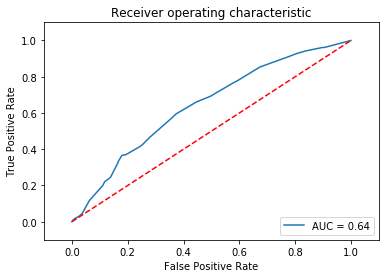

In [70]:
# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = decision_tree_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
# Plot the decision tree
# Remember you should install package graphviz first
import graphviz

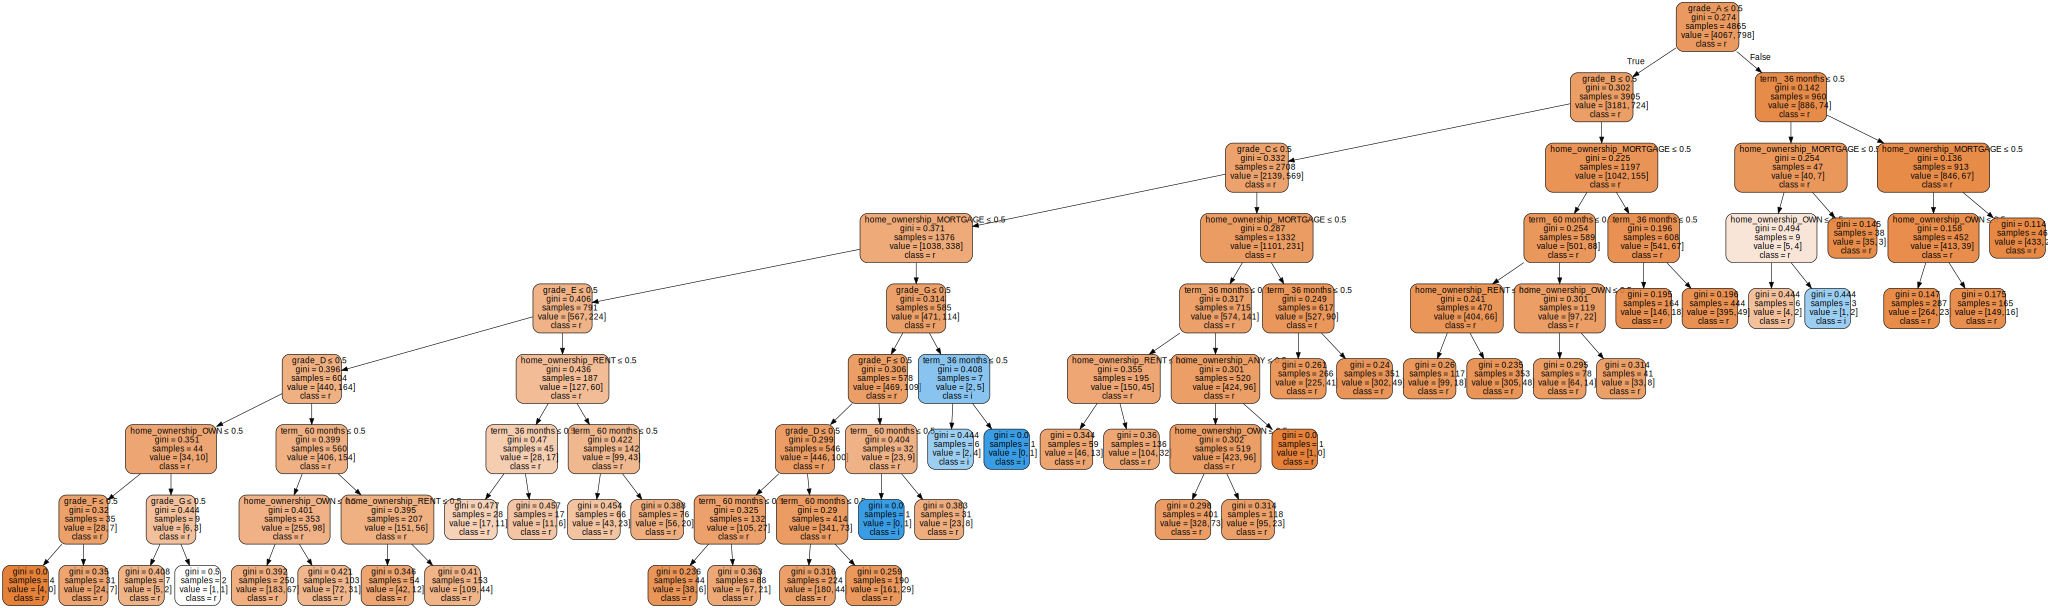

In [72]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=features, class_names=output, 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [73]:
# Store in .pdf 
graph.render("Lending Club Loan Status") 

'Lending Club Loan Status.pdf'

#### Assignments: 
* Use Titanic data (“train.csv”); Fit the model using `scikit-learn` with different metrics (e.g., information gain, gini index)
* Observe and report the differences (e.g., best features for splitting, tree structure, performance, etc.)
* There are no right or wrong answers. Don't worry. Just report what you've seen. 

**Note:** You may need to do simple data cleaning by yourself, such as binarizing output variable "survived", and transforming categorical variables to dummy variables.

In [74]:
# Titanic dataset
%pwd
titanic = pd.read_csv("./train.csv", low_memory=False)
titanic.head(n=10)

ID  Age         Age Class Passenger Class  Gender  \
0   1   28   Young Adulthood           Third    Male   
1   2   23   Young Adulthood          Second    Male   
2   3    5         Childhood           Third  Female   
3   4   18         Childhood           Third    Male   
4   5   42  Middle Adulthood          Second  Female   
5   6   61     Elder Citizen           First    Male   
6   7   48  Middle Adulthood           First  Female   
7   8    1         Childhood           Third    Male   
8   9   30   Young Adulthood           Third    Male   
9  10   19         Childhood          Second    Male   

  No of Siblings or Spouses on Board No of Parents or Children on Board  \
0                                  0                                  0   
1                                  0                                  0   
2                                >=2                                >=2   
3                                  0                                  0   
4                                  0                                  0   
5                                  0                                  0   
6                                  1                                  0   
7                                  1                                  1   
8                                  0                                  0   
9                                  0                                  0   

  Survived  
0       No  
1       No  
2      Yes  
3       No  
4       No  
5       No  
6      Yes  
7       No  
8       No  
9       No

In [75]:
# Transform categorical features to binary features
age_dummy = pd.get_dummies(titanic['Age Class'], prefix='Ageclass')  
passenger_dummy = pd.get_dummies(titanic['Passenger Class'], prefix='passenger')
titanic['output'] = titanic['Survived'].map(lambda x: 1 if x == 'Yes' else 0)
titanic['gender'] = titanic['Gender'].map(lambda x: 1 if x == 'Male' else 0)

titanic.head()

ID  Age         Age Class Passenger Class  Gender  \
0   1   28   Young Adulthood           Third    Male   
1   2   23   Young Adulthood          Second    Male   
2   3    5         Childhood           Third  Female   
3   4   18         Childhood           Third    Male   
4   5   42  Middle Adulthood          Second  Female   

  No of Siblings or Spouses on Board No of Parents or Children on Board  \
0                                  0                                  0   
1                                  0                                  0   
2                                >=2                                >=2   
3                                  0                                  0   
4                                  0                                  0   

  Survived  output  gender  
0       No       0       1  
1       No       0       1  
2      Yes       1       0  
3       No       0       1  
4       No       0       0

In [76]:
# Select features and output
features = ['Age']       
output = ['output']

dataset = titanic[features+output]
dataset

Age  output
0    28       0
1    23       0
2     5       1
3    18       0
4    42       0
5    61       0
6    48       1
7     1       0
8    30       0
9    19       0
10   25       0
11   20       1
12    0       1
13   27       1
14   31       0
15   62       0
16   19       1
17   30       0
18   20       1
19   13       1
20   25       0
21   23       0
22   28       0
23   60       0
24    4       0
25   24       1
26   55       1
27   21       0
28   37       1
29   27       1

In [77]:
dataset = dataset.join([age_dummy, passenger_dummy])
dataset.head()

Age  output  Ageclass_Childhood  Ageclass_Elder Citizen  \
0   28       0                   0                       0   
1   23       0                   0                       0   
2    5       1                   1                       0   
3   18       0                   1                       0   
4   42       0                   0                       0   

   Ageclass_Middle Adulthood  Ageclass_Young Adulthood  passenger_First  \
0                          0                         1                0   
1                          0                         1                0   
2                          0                         0                0   
3                          0                         0                0   
4                          1                         0                0   

   passenger_Second  passenger_Third  
0                 0                1  
1                 1                0  
2                 0                1  
3                 0                1  
4                 1                0

In [78]:
# Update our features and output
features = dataset.columns[2:]
output = dataset.columns[1]
features

Index(['Ageclass_Childhood', 'Ageclass_Elder Citizen',
       'Ageclass_Middle Adulthood', 'Ageclass_Young Adulthood',
       'passenger_First', 'passenger_Second', 'passenger_Third'],
      dtype='object')

In [79]:
# Fit the model on train data
X = dataset[features]
y = dataset[output]
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree_model = decision_tree.fit(X, y)
decision_tree_model.classes_



array([0, 1])

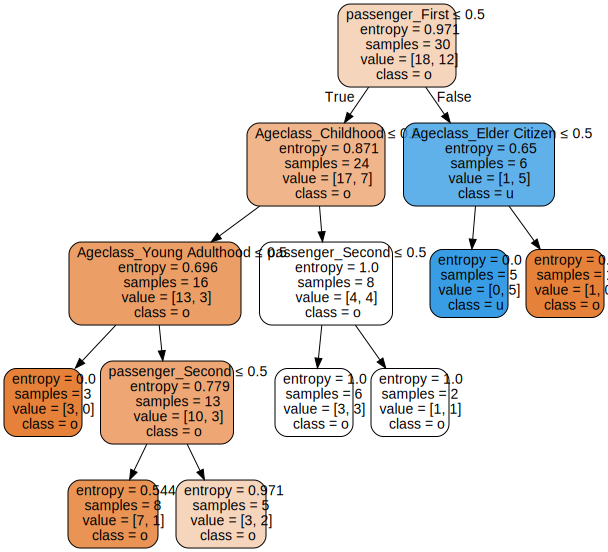

In [80]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=features, class_names=output, 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

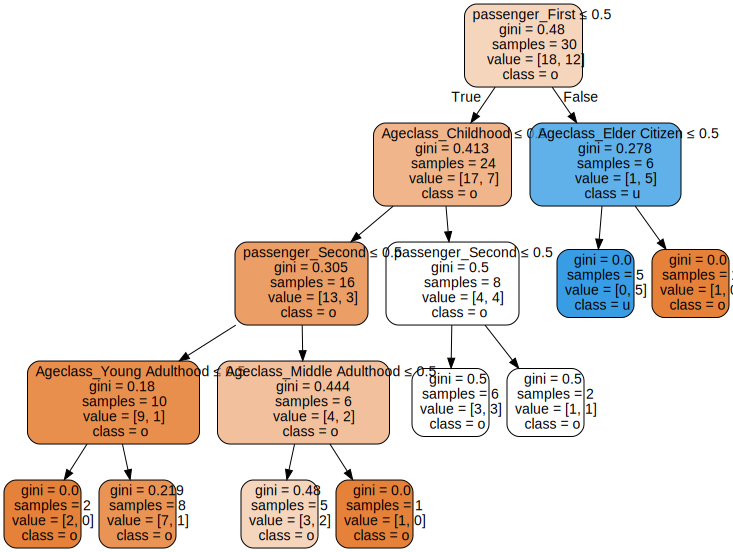

In [81]:
# Fit the model on train data
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree_model = decision_tree.fit(X, y)

dot_data = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=features, class_names=output, 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

* The split starts with the attribute Gender, which will be the same if Entropy is used, as calculated in the previous assignment in Excel. As calculated earlier in Excel, the Gini Index is highest for Gender, followed by No of Siblings or Spouses.

* The depth of the tree is 4.


## 5 Questions (Just think about them)

### 5.1 What if features are continuous?

* If features are continuous, then the features are first converted to ranges such that they become categorical.

### 5.2 What if output is continuous? 

* Use Regression Tree

## 6 References

[1] Jason Brownlee, 2018, [Machine Learning Algorithms from Scratch with Python](https://machinelearningmastery.com/machine-learning-algorithms-from-scratch/). <br/>
[2] Peter Harrington, 2012. Machine Learning in Action. Shelter Island, NY: Manning Publications Co.